In [1]:
import pandas as pd 
import numpy as np

df=pd.read_csv('Merged.csv')

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum(), 'no null values')




      Name        Date    High     Low    Open   Close  Volume     Marketcap  \
0  Bitcoin  28-04-2013  135.98  132.10  135.30  134.21     0.0  1.488567e+09   
1  Bitcoin  29-04-2013  147.49  134.00  134.44  144.54     0.0  1.603769e+09   
2  Bitcoin  30-04-2013  146.93  134.05  144.00  139.00     0.0  1.542813e+09   
3  Bitcoin  01-05-2013  139.89  107.72  139.00  116.99     0.0  1.298955e+09   
4  Bitcoin  02-05-2013  125.60   92.28  116.38  105.21     0.0  1.168517e+09   

   Year  Average  
0  2013  134.040  
1  2013  140.745  
2  2013  140.490  
3  2013  123.805  
4  2013  108.940  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052325 entries, 0 to 1052324
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Name       1052325 non-null  object 
 1   Date       1052325 non-null  object 
 2   High       1052325 non-null  float64
 3   Low        1052325 non-null  float64
 4   Open       1052325 non-null  float6

C:\Users\SHEEYASH\AppData\Local\Temp\ipykernel_2684\1986837745.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


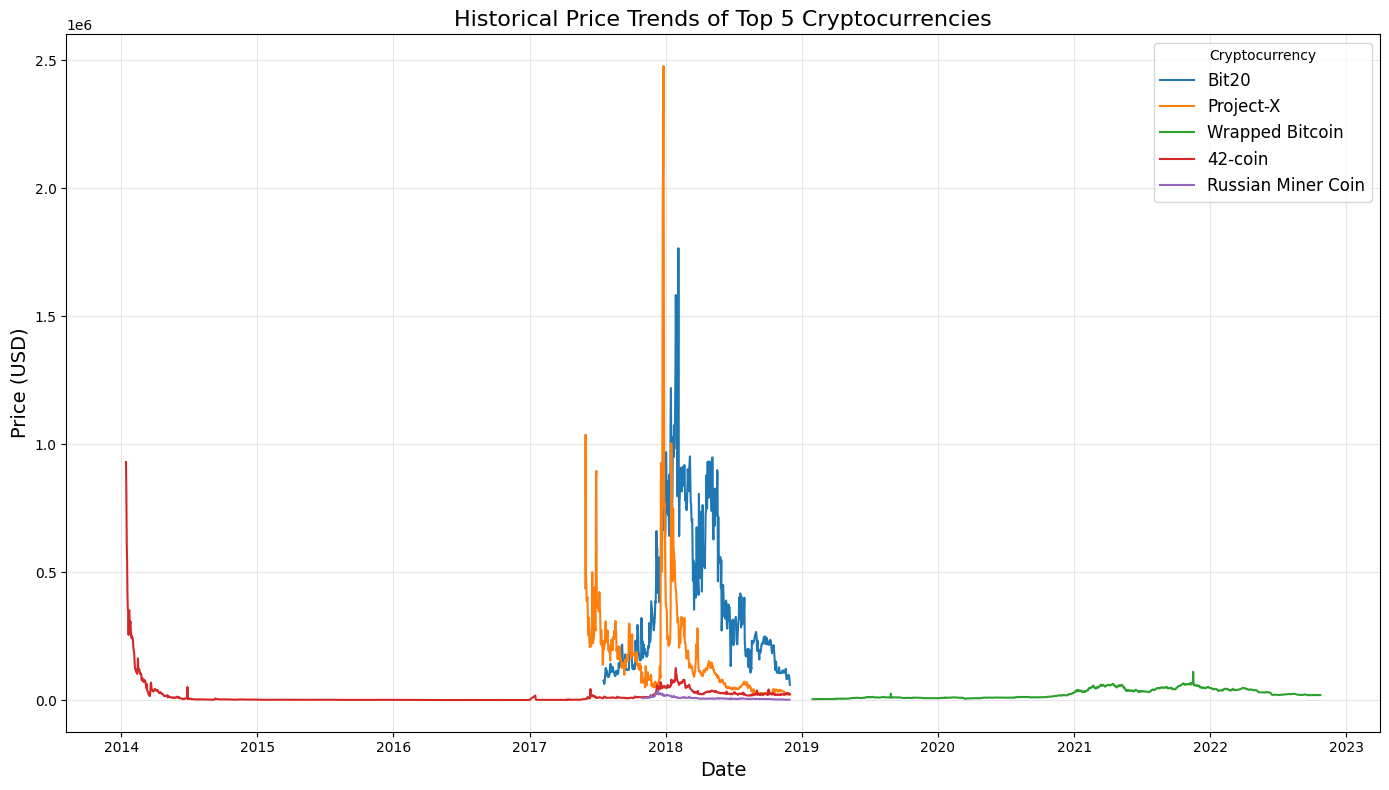

In [2]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


# Filter the top 5 cryptocurrencies by average price
top_cryptos = df.groupby('Name')['Average'].mean().sort_values(ascending=False).head(5).index
filtered_df = df[df['Name'].isin(top_cryptos)]

# Plot historical price trends using Matplotlib
plt.figure(figsize=(14, 8))
for crypto in top_cryptos:
    crypto_data = filtered_df[filtered_df['Name'] == crypto]
    plt.plot(crypto_data['Date'], crypto_data['Average'], label=crypto)

plt.title('Historical Price Trends of Top 5 Cryptocurrencies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(title='Cryptocurrency', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()






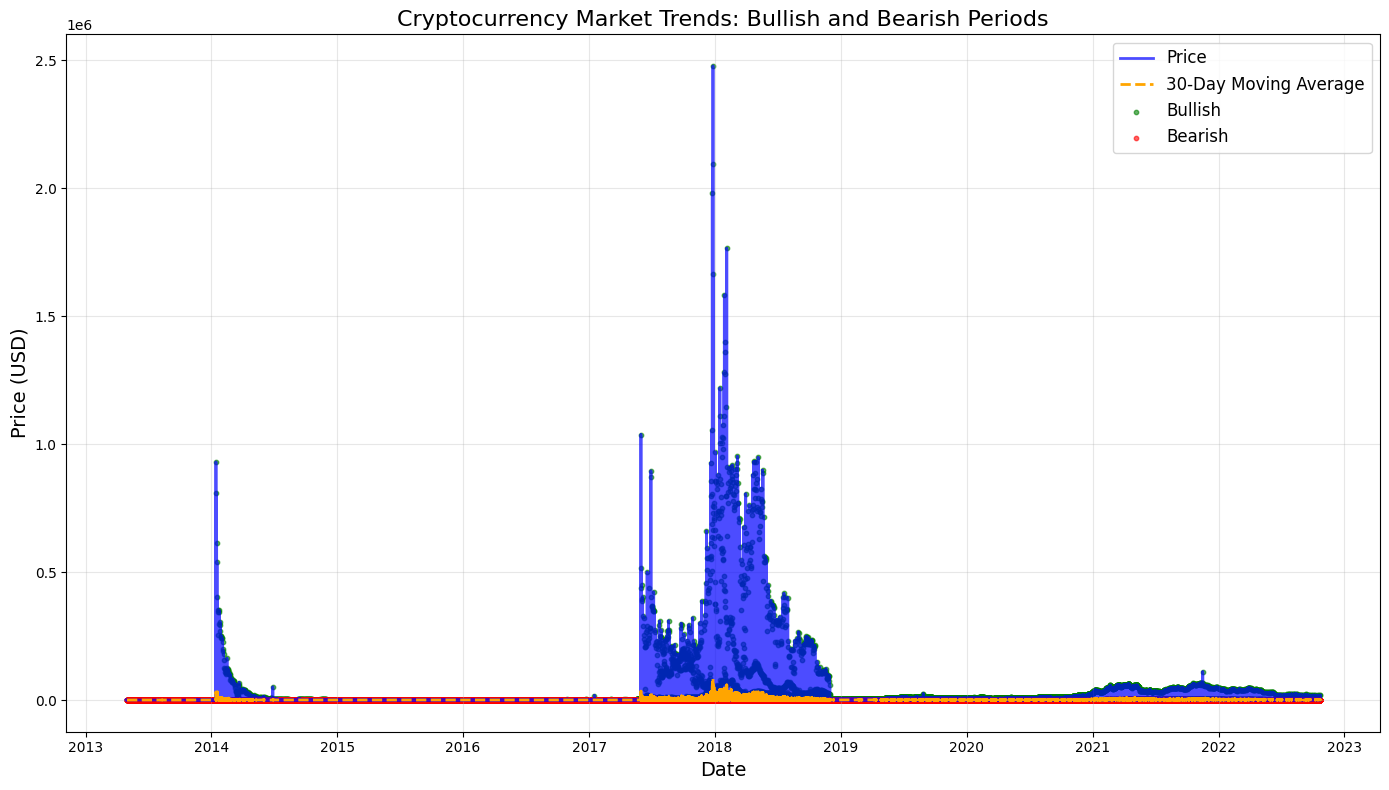

In [ ]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Calculate the 30-day moving average
df['Moving_Avg'] = df['Average'].rolling(window=30).mean()

# Identify bullish and bearish periods
df['Trend'] = 'Neutral'  # Default trend
df.loc[df['Average'] > df['Moving_Avg'], 'Trend'] = 'Bullish'
df.loc[df['Average'] < df['Moving_Avg'], 'Trend'] = 'Bearish'


plt.figure(figsize=(14, 8))

# Plot historical prices
plt.plot(df['Date'], df['Average'], label='Price', color='blue', linewidth=2, alpha=0.7)

# Plot moving average
plt.plot(df['Date'], df['Moving_Avg'], label='30-Day Moving Average', color='orange', linestyle='--', linewidth=2)

# Highlight bullish periods
plt.scatter(df[df['Trend'] == 'Bullish']['Date'], 
            df[df['Trend'] == 'Bullish']['Average'], 
            color='green', label='Bullish', alpha=0.6, s=10)

# Highlight bearish periods
plt.scatter(df[df['Trend'] == 'Bearish']['Date'], 
            df[df['Trend'] == 'Bearish']['Average'], 
            color='red', label='Bearish', alpha=0.6, s=10)


plt.title('Cryptocurrency Market Trends: Bullish and Bearish Periods', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

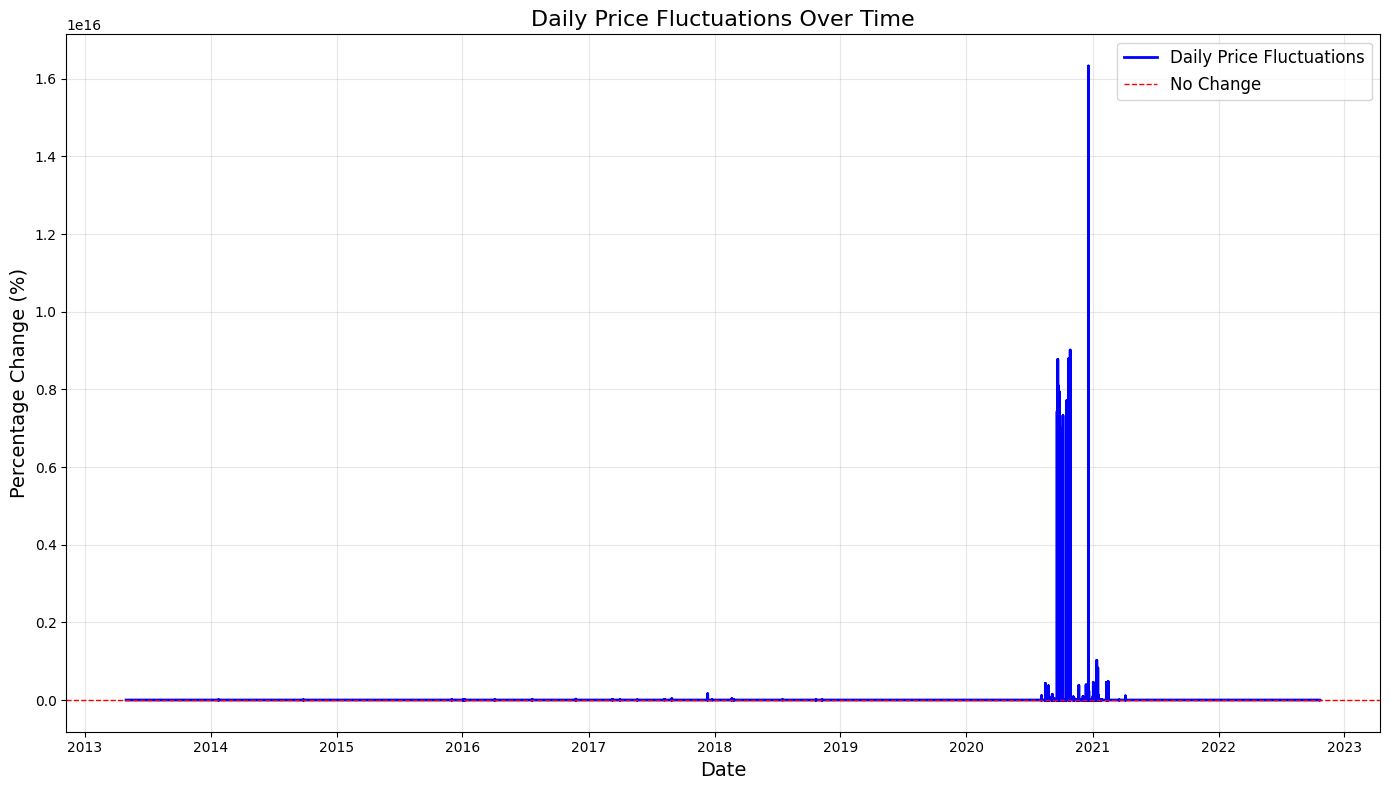

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df['Price_Change'] = df['Average'].pct_change() * 100  # Percentage change


df = df.dropna()

# Plot price fluctuations over time
plt.figure(figsize=(14, 8))

# Plot daily price fluctuations
plt.plot(df['Date'], df['Price_Change'], label='Daily Price Fluctuations', color='blue', linewidth=2)


plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='No Change')

# Add labels, title, and legend
plt.title('Daily Price Fluctuations Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Change (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()


plt.show()

c:\Users\SHEEYASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\SHEEYASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\SHEEYASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\SHEEYASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No suppor

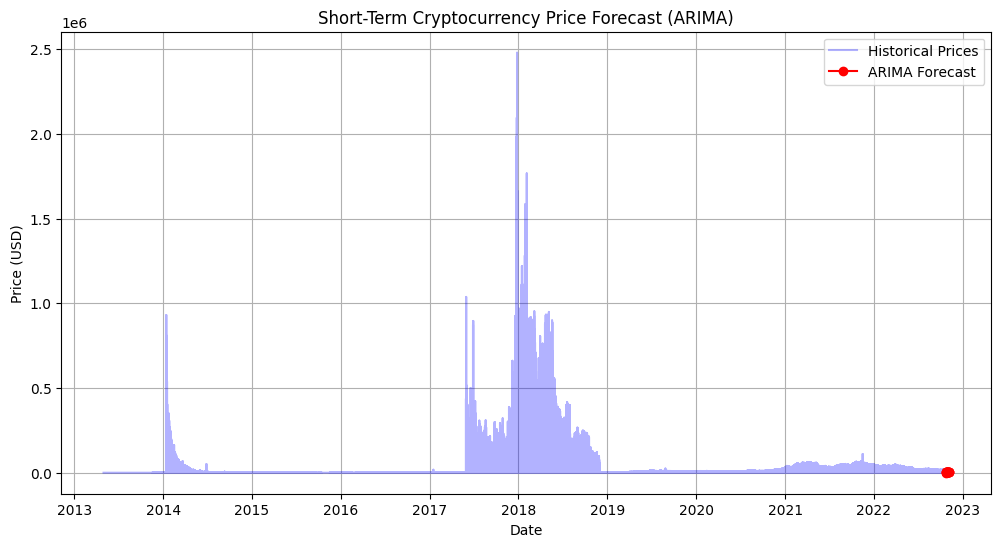

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model
model = ARIMA(df['Average'], order=(5, 1, 0)) 
arima_result = model.fit()

# Forecast the next 15 days
forecast = arima_result.forecast(steps=15)

# Generate future dates
future_dates = pd.date_range(start=df['Date'].iloc[-1], periods=len(forecast), freq='D')

# Plot ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Average'], label='Historical Prices', alpha=0.3, color='blue')
plt.plot(future_dates, forecast, label='ARIMA Forecast', color='red', marker='o')
plt.title('Short-Term Cryptocurrency Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

c:\Users\SHEEYASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/5
32884/32884 ━━━━━━━━━━━━━━━━━━━━ 207s 6ms/step - loss: 2.8088e-05
Epoch 2/5
32884/32884 ━━━━━━━━━━━━━━━━━━━━ 207s 6ms/step - loss: 2.8088e-05
Epoch 2/5
32884/32884 ━━━━━━━━━━━━━━━━━━━━ 200s 6ms/step - loss: 2.8348e-05
Epoch 3/5
32884/32884 ━━━━━━━━━━━━━━━━━━━━ 200s 6ms/step - loss: 2.8348e-05
Epoch 3/5
32884/32884 ━━━━━━━━━━━━━━━━━━━━ 199s 6ms/step - loss: 2.6089e-05
Epoch 4/5
32884/32884 ━━━━━━━━━━━━━━━━━━━━ 199s 6ms/step - loss: 2.6089e-05
Epoch 4/5
32884/32884 ━━━━━━━━━━━━━━━━━━━━ 229s 7ms/step - loss: 2.7794e-05
Epoch 5/5
32884/32884 ━━━━━━━━━━━━━━━━━━━━ 229s 7ms/step - loss: 2.7794e-05
Epoch 5/5
32884/32884 ━━━━━━━━━━━━━━━━━━━━ 225s 7ms/step - loss: 2.7758e-05
32884/32884 ━━━━━━━━━━━━━━━━━━━━ 225s 7ms/step - loss: 2.7758e-05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━

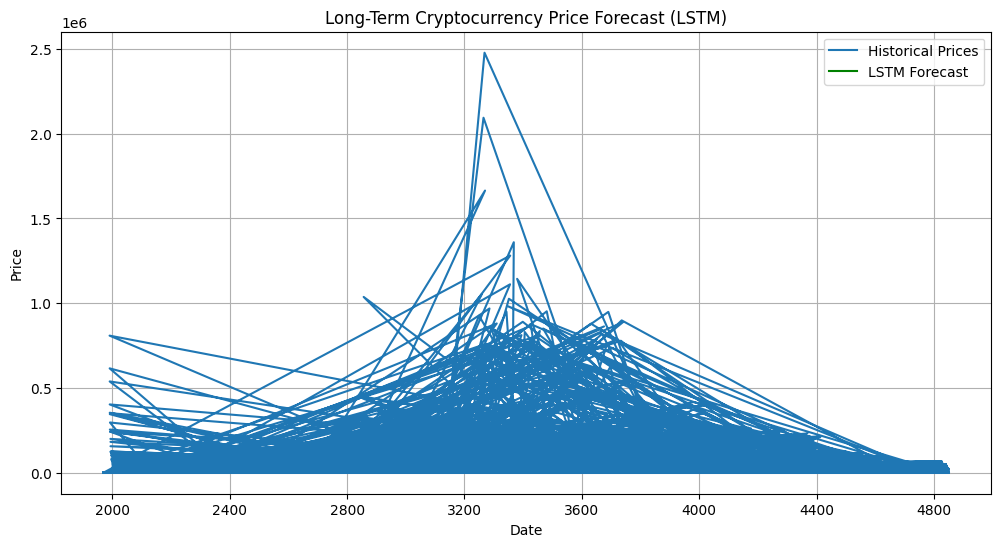

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from tensorflow.python.client import device_lib

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Average'].values.reshape(-1, 1))

df = df.reset_index()  # Reset index to access 'Date' column
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df = df.sort_values('Date')

# Prepare the data for LSTM
sequence_length = 30
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=25, return_sequences=True, input_shape=(X.shape[1], 1)))  
model.add(LSTM(units=25, return_sequences=False)) 
model.add(Dense(units=10))  
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
df = df.sample(frac=0.5, random_state=42) 
model.fit(X, y, batch_size=32, epochs=5) 

# Predict the next 30 days
lstm_forecast = []
last_sequence = scaled_data[-sequence_length:]
for _ in range(30):
    last_sequence = np.reshape(last_sequence, (1, sequence_length, 1))
    next_value = model.predict(last_sequence)[0, 0]
    lstm_forecast.append(next_value)
    last_sequence = np.append(last_sequence[:, 1:, :], [[[next_value]]], axis=1)

lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1))

future_dates = pd.date_range(start=df.index[-1], periods=30, freq='D')

# Plot LSTM forecast with proper dates
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Average'], label='Historical Prices')
plt.plot(future_dates, lstm_forecast.flatten(), label='LSTM Forecast', color='green')
plt.title('Long-Term Cryptocurrency Price Forecast (LSTM)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()